In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
a_phys=5/(1600*700)
a_phys*10/0.005**2
a_phys

4.464285714285715e-06

In [2]:
4.464e-6*10/0.005**2

1.7855999999999999

Text(0.5, 1.0, 'Surface temperature evolution')

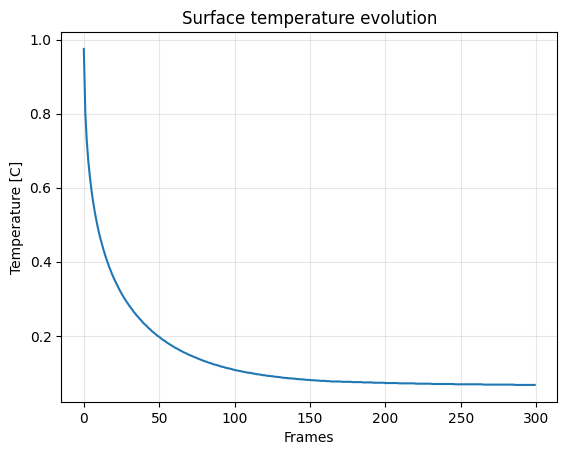

In [3]:
plt.plot(data_cube[:,256,256])
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.title("Surface temperature evolution")

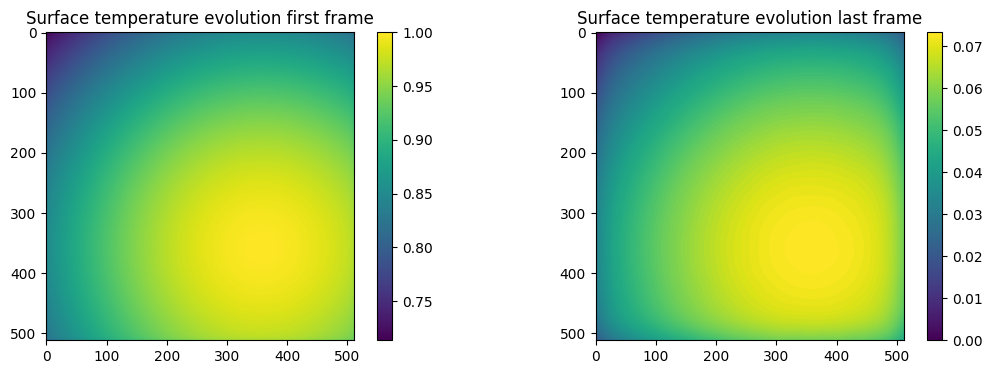

In [4]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.imshow(data_cube[0,:,:])
plt.title("Surface temperature evolution first frame")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(data_cube[-1,:,:])
plt.title("Surface temperature evolution last frame")
plt.colorbar()

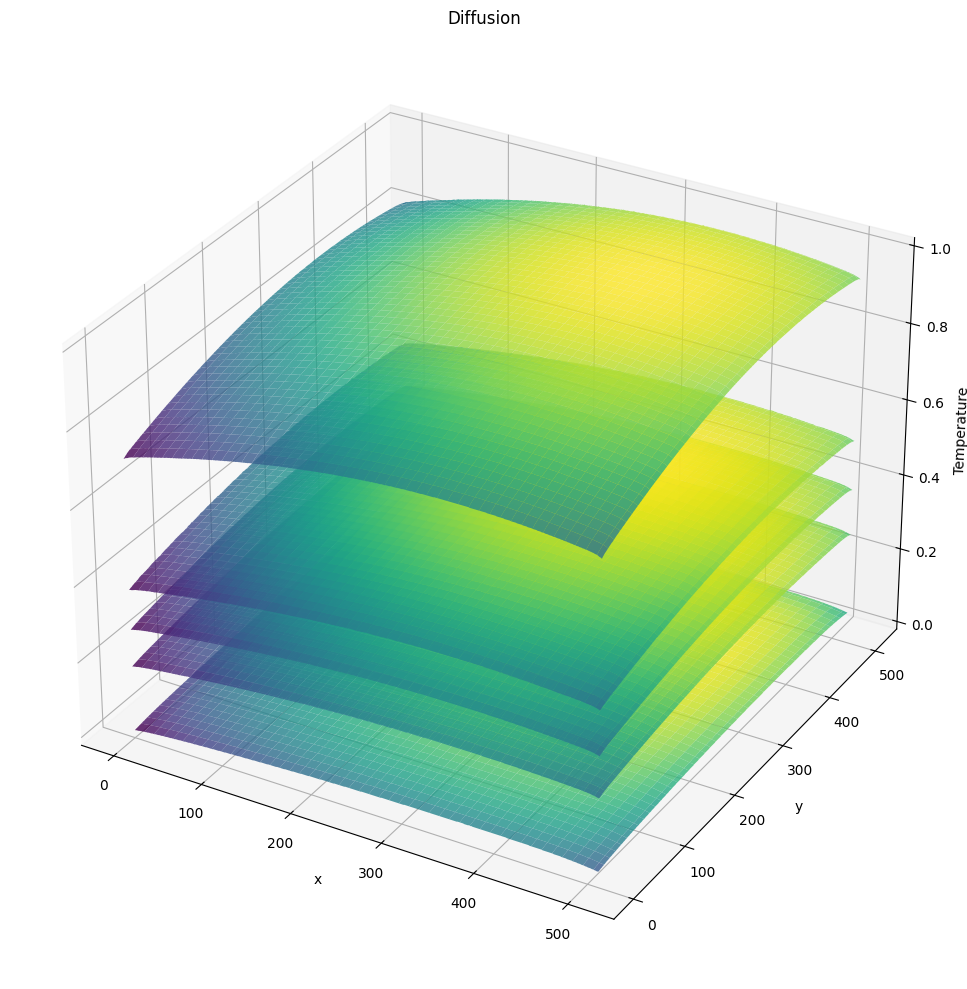

In [5]:
def plot_images_stacked(img):
    H, W = img[0].shape
    x = np.arange(W)
    y = np.arange(H)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(img)):
        ax.plot_surface(X, Y, img[i], cmap='viridis', alpha=0.8)

    ax.set_title("Diffusion")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Temperature")

    plt.tight_layout()
    plt.show()
plot_images_stacked([data_cube[0,:,:],  data_cube[7,:,:],data_cube[15,:,:], data_cube[30,:,:],data_cube[-1,:,:]])

In [6]:
from helper_function import DomainDataset
n_coll=100000
coll_data=DomainDataset(n_samples=n_coll,n_dim=3,method='lhs')
x_coll=coll_data.resample()
x_coll.dtype

torch.float32

In [7]:
tensor=torch.rand(2000,3)

In [8]:
tensor.size()

torch.Size([2000, 3])

In [9]:
z_idx=torch.zeros(tensor.size()[0],1)
z_idx

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [10]:
data=torch.concatenate([tensor,z_idx],axis=1)
data

tensor([[0.1969, 0.1791, 0.7979, 0.0000],
        [0.5967, 0.9809, 0.3495, 0.0000],
        [0.9116, 0.5351, 0.1209, 0.0000],
        ...,
        [0.8316, 0.1973, 0.8462, 0.0000],
        [0.1376, 0.4535, 0.7645, 0.0000],
        [0.0396, 0.7845, 0.3554, 0.0000]])

In [11]:
data=np.zeros(3000).reshape(-1,1)

In [12]:
data.shape[0]

3000

In [13]:
from helper_function import DataGeneration

data_path = r'/Volumes/KINGSTON/Synthetic_data_no_defect/2025_10_24_sample_100x100x5mm_no_defect_isotropic_gaussian_heat.npz'
data = np.load(data_path, allow_pickle=True)
data_cube = data['data'][34:, :, :]  # shape [T, Y, X]

d_operator=DataGeneration(data_cube,60000,20000,5000)

In [14]:
X_data,Y_data=d_operator.generate()

In [18]:
X_data.size()

torch.Size([100000, 4])

In [24]:
Y_data.size()

torch.Size([100000, 1])

In [21]:
Y_data.min()

tensor(0.)